In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Exploration

In [2]:
df = pd.read_csv('Netflix Userbase.csv')

In [3]:
# show first 5 rows
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [4]:
# show last 5 rows
df.tail()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month
2499,2500,Basic,15,13-08-22,12-07-23,United States,35,Female,Smart TV,1 Month


In [5]:
# Dstaset shape(rows,columns)
df.shape

(2500, 10)

In [6]:
# Getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [7]:
# recast data type to datetime
df['Join Date'] = df['Join Date'].astype('datetime64[ns]')
df['Last Payment Date'] = df['Last Payment Date'].astype('datetime64[ns]')

In [8]:
# another way
# df['Join Date'] = pd.to_datetime(df['Join Date'])
# df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])

In [9]:
df['Join Date'].dtype

dtype('<M8[ns]')

In [10]:
# check duplicated rows
print(df.duplicated().any())

False


In [11]:
# get overall statistics
df[['Monthly Revenue','Age']].describe()

,Monthly Revenue,Age
count,2500.000000,2500.000000
mean,12.508400,38.795600
std,1.686851,7.171778
min,10.000000,26.000000
25%,11.000000,32.000000
50%,12.000000,39.000000
75%,14.000000,45.000000
max,15.000000,51.000000


In [12]:
# categorical data info
df.describe(include="O")

,Subscription Type,Country,Gender,Device,Plan Duration
count,2500,2500,2500,2500,2500
unique,3,10,2,4,1
top,Basic,United States,Female,Laptop,1 Month
freq,999,451,1257,636,2500


Text(0.5, 1.0, 'Age')

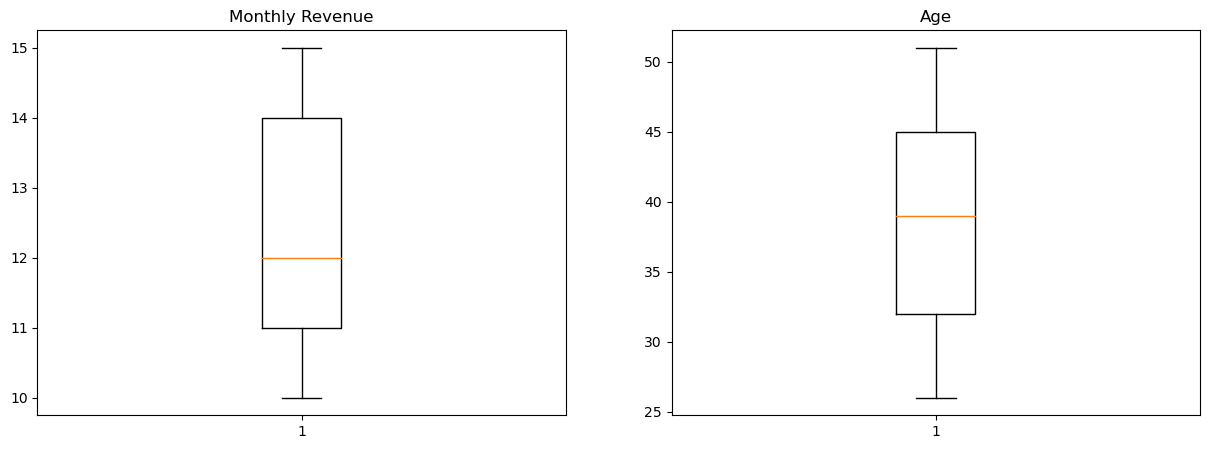

In [13]:
# check outliers
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].boxplot(df['Monthly Revenue'])
ax[0].set_title("Monthly Revenue")
ax[1].boxplot(df['Age'])
ax[1].set_title("Age")

In [14]:
# Check number of unique values in data
df.nunique()

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

In [15]:
# The most frequent subscribers age
df['Age'].value_counts().idxmax()

39

In [16]:
# The number of subscribers in each Subscription Type
df['Subscription Type'].value_counts()

Basic       999
Standard    768
Premium     733
Name: Subscription Type, dtype: int64

In [17]:
# Each device count
df['Device'].value_counts()

Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: Device, dtype: int64

In [18]:
# The number of subscribers of both genders(Male, Female)
df['Gender'].value_counts()

Female    1257
Male      1243
Name: Gender, dtype: int64

In [19]:
# The country with the most subscribers 
df['Country'].value_counts().idxmax()

'United States'

In [20]:
# The country with the least number of subscribers 
df['Country'].value_counts().idxmin()

'United Kingdom'

In [21]:
# The last subscription date
df['Join Date'].max()

Timestamp('2023-12-01 00:00:00')

In [22]:
# The first subscription date
df['Join Date'].min()

Timestamp('2021-05-09 00:00:00')

In [23]:
# The most device is used
df['Device'].value_counts().idxmax()

'Laptop'

## Visualizing

In [24]:
Basic = df.loc[df['Subscription Type']=='Basic','Monthly Revenue'].sum()
Standard = df.loc[df['Subscription Type']=='Standard','Monthly Revenue'].sum()
Premium  = df.loc[df['Subscription Type']=='Premium','Monthly Revenue'].sum()

In [25]:
RevData = {'Subscription Type':['Basic','Standard','Premium'],'Monthly Revenue':[Basic,Standard,Premium]}

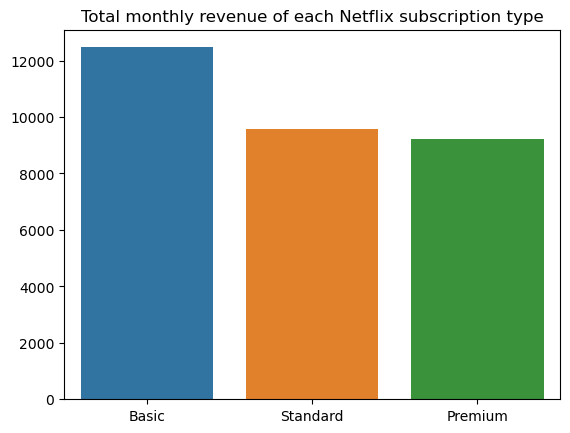

In [26]:
sns.barplot(x = 'Subscription Type', y = 'Monthly Revenue', data=RevData)
plt.title('Total monthly revenue of each Netflix subscription type')
plt.show()

In [27]:
devices = df['Device'].value_counts()

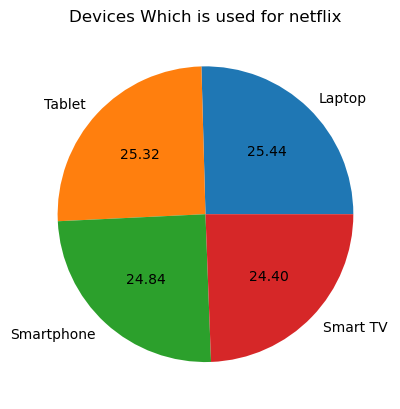

In [28]:
plt.pie(devices,labels=devices.index,autopct='%.2f')
plt.title('Devices Which is used for netflix')
plt.show()

In [29]:
gender = df['Gender'].value_counts()

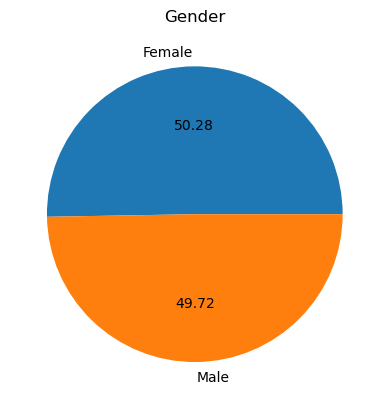

In [30]:
plt.pie(gender,labels=gender.index,autopct='%.2f')
plt.title('Gender')
plt.show()

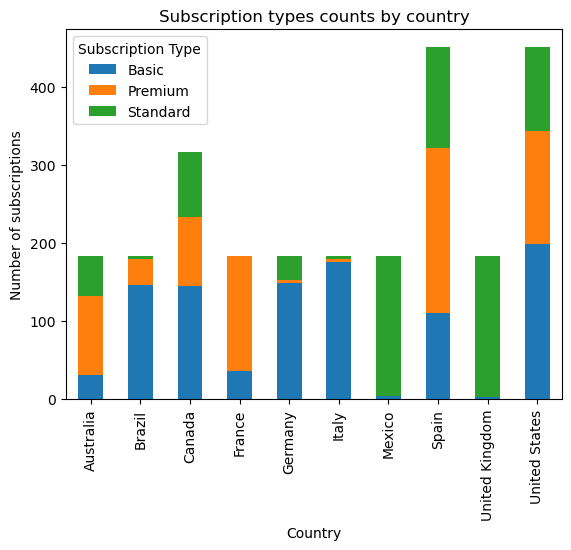

In [31]:
# Subscription types counts by country
subscription_counts = df.groupby(['Country', 'Subscription Type'])['User ID'].count().unstack()
subscription_counts.plot(kind = 'bar',
       stacked = True)
plt.xlabel('Country')
plt.ylabel('Number of subscriptions')
plt.title('Subscription types counts by country')
plt.legend(title='Subscription Type')
plt.show()

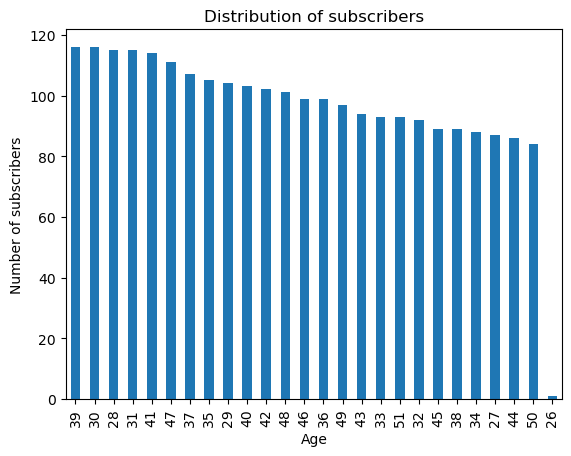

In [32]:
# Distribution of subscribers 
Age = df['Age'].value_counts()
Age.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Number of subscribers')
plt.title('Distribution of subscribers')
plt.show()